In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-data/db.xlsx
/kaggle/input/data-barid-csv/data.csv


In [3]:
!pip install imbalanced-learn==0.10.1 scikit-learn==1.2.2 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 69.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 54.4 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 41.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
   

## EDA (Exploratory Data Analysis)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/kaggle/input/data-barid-csv/data.csv')
df.head(5)

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,45680,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,45668,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,45682,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,45676,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,45687,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [6]:
df.shape

(200000, 24)

In [7]:
df["Is_Fraud"].value_counts()

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  int64  
 10  Transaction_Time         200000 non-null  float64
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [9]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [10]:
df['Transaction_Time'].head(10)

0    0.669525
1    0.718669
2    0.131852
3    0.518773
4    0.771366
5    0.284641
6    0.037187
7    0.170000
8    0.451528
9    0.192755
Name: Transaction_Time, dtype: float64

In [11]:
df['Transaction_Date'].head(10)

0    45680
1    45668
2    45682
3    45676
4    45687
5    45682
6    45661
7    45673
8    45682
9    45659
Name: Transaction_Date, dtype: int64

In [12]:
df['Merchant_ID'].unique()

array(['214e03c5-5c34-40d1-a66c-f440aa2bbd02',
       'f9e3f11f-28d3-4199-b0ca-f225a155ede6',
       '97977d83-5486-4510-af1c-8dada3e1cfa0', ...,
       'a313cfbc-ef3d-4e59-8347-a948ac292a6f',
       '08ef8813-dea0-42bf-9df5-0a63fe07673d',
       'e0d4aa67-43c0-4aed-836b-698cfaf2df41'], dtype=object)

In [13]:
df['Merchant_Category'].value_counts()

Merchant_Category
Restaurant       33525
Entertainment    33421
Electronics      33409
Clothing         33340
Groceries        33187
Health           33118
Name: count, dtype: int64

In [14]:
df['Transaction_Currency'].head()

0    INR
1    INR
2    INR
3    INR
4    INR
Name: Transaction_Currency, dtype: object

In [15]:
df['Transaction_Location'].value_counts()

Transaction_Location
Kavaratti, Lakshadweep                             5954
Chandigarh, Chandigarh                             5797
Daman, Dadra and Nagar Haveli and Daman and Diu    2022
Car Nicobar, Andaman and Nicobar Islands           1956
Port Blair, Andaman and Nicobar Islands            1950
                                                   ... 
Nashik, Maharashtra                                1125
Guwahati, Assam                                    1122
Asansol, West Bengal                               1118
Jaipur, Rajasthan                                  1115
Silchar, Assam                                     1112
Name: count, Length: 148, dtype: int64

In [16]:
df['Transaction_Currency'].unique()

array(['INR'], dtype=object)

In [17]:
df['Bank_Branch'].unique()

array(['Thiruvananthapuram Branch', 'Nashik Branch', 'Bhagalpur Branch',
       'Chennai Branch', 'Amritsar Branch', 'Ahmedabad Branch',
       'New Delhi Branch', 'Port Blair Branch', 'Bhopal Branch',
       'Jagdalpur Branch', 'Vadodara Branch', 'Chandigarh Branch',
       'Champhai Branch', 'Korba Branch', 'Kolkata Branch', 'Gaya Branch',
       'Jorethang Branch', 'Silvassa Branch', 'Kanpur Branch',
       'Nagpur Branch', 'Bhubaneswar Branch', 'Ambassa Branch',
       'Jorhat Branch', 'Diglipur Branch', 'Salem Branch', 'Durg Branch',
       'Churachandpur Branch', 'Kottayam Branch', 'Varanasi Branch',
       'Imphal Branch', 'Belgaum Branch', 'Agra Branch',
       'Durgapur Branch', 'Daman Branch', 'Bilaspur Branch',
       'Nellore Branch', 'Patiala Branch', 'Jabalpur Branch',
       'Mapusa Branch', 'Agartala Branch', 'Aurangabad Branch',
       'Gurugram Branch', 'Vijayawada Branch', 'Kavaratti Branch',
       'Bokaro Branch', 'Siliguri Branch', 'Udaipur Branch',
       'Nongst

In [18]:
df['Transaction_Description'].unique()

array(['Bitcoin transaction', 'Grocery delivery',
       'Mutual fund investment', 'Food delivery', 'Debt repayment',
       'Seminar registration', 'Public transport pass', 'Online shopping',
       'Vacation payment', 'Electronics purchase',
       'Streaming service subscription', 'Subscription renewal',
       'Laundry service', 'Personal loan repayment', 'Insurance premium',
       'Pet care', 'Gift for colleague', 'Smart home device purchase',
       'Beauty products', 'Car service', 'Specialty store shopping',
       'Charity donation', 'Taxi fare', 'Christmas shopping',
       'Online subscription', 'Restaurant dining',
       'Loyalty points redemption', 'Mobile phone payment',
       'Bank transfer', 'Property tax payment', 'Penalty fee',
       'School fee payment', 'Online gaming', 'Cryptocurrency purchase',
       'Team lunch', 'Credit card payment', 'Membership subscription',
       'Stock investment', 'Transportation fare', 'Jewelry purchase',
       'Corporate event tic

In [19]:
print(f"date info:{df['Transaction_Date'].head()}")
print(f"time info:{df['Transaction_Time'].head()}")

date info:0    45680
1    45668
2    45682
3    45676
4    45687
Name: Transaction_Date, dtype: int64
time info:0    0.669525
1    0.718669
2    0.131852
3    0.518773
4    0.771366
Name: Transaction_Time, dtype: float64


#### Convert Transaction_Date from Excel format to datetime

In [20]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], origin='1899-12-30', unit='D')

#### Convert Transaction_Time (fraction of a day) to seconds

In [21]:
df['Transaction_Seconds'] = (df['Transaction_Time'] * 24 * 60 * 60).astype(int)

#### Combine date and time into a full timestamp

In [22]:
df['Transaction_Timestamp'] = df['Transaction_Date'] + pd.to_timedelta(df['Transaction_Seconds'], unit='s')

#### Extract features from the timestamp

In [23]:
df['Hour'] = df['Transaction_Timestamp'].dt.hour
df['Minute'] = df['Transaction_Timestamp'].dt.minute
df['DayOfWeek'] = df['Transaction_Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['Day'] = df['Transaction_Timestamp'].dt.day
df['Month'] = df['Transaction_Timestamp'].dt.month
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df['IsNight'] = df['Hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Customer_ID              200000 non-null  object        
 1   Customer_Name            200000 non-null  object        
 2   Gender                   200000 non-null  object        
 3   Age                      200000 non-null  int64         
 4   State                    200000 non-null  object        
 5   City                     200000 non-null  object        
 6   Bank_Branch              200000 non-null  object        
 7   Account_Type             200000 non-null  object        
 8   Transaction_ID           200000 non-null  object        
 9   Transaction_Date         200000 non-null  datetime64[ns]
 10  Transaction_Time         200000 non-null  float64       
 11  Transaction_Amount       200000 non-null  float64       
 12  Merchant_ID     

In [25]:
X = df.drop('Is_Fraud',axis=1)
y= df['Is_Fraud'].values

not_features = ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City','Bank_Branch','Transaction_Description','Customer_Contact','Transaction_Currency','Transaction_Location','Merchant_ID']

num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()
date_features = ['Transaction_Seconds', 'IsWeekend', 'IsNight']

num_features = [f for f in num_features if f not in not_features + ['Transaction_Seconds', 'IsWeekend', 'IsNight']]
cat_features = [f for f in cat_features if f not in not_features]

In [26]:
print(f'num_features:{num_features}')
print(f'cat_features:{cat_features}')
print(f'date_features:{date_features}')


num_features:['Transaction_Time', 'Transaction_Amount', 'Account_Balance']
cat_features:['Account_Type', 'Transaction_ID', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Device_Type', 'Customer_Email']
date_features:['Transaction_Seconds', 'IsWeekend', 'IsNight']


In [27]:
df[num_features].head()

,Transaction_Time,Transaction_Amount,Account_Balance
0,0.669525,32415.45,74557.27
1,0.718669,43622.60,74622.66
2,0.131852,63062.56,66817.99
3,0.518773,14000.72,58177.08
4,0.771366,18335.16,16108.56


In [28]:
df = df.drop(columns=df.select_dtypes(include=['datetime64[ns]']).columns)
df = df.drop(columns=df[not_features].columns)

In [29]:
df_4_DT = df.copy()

In [30]:
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [31]:
df[num_features].head()

,Transaction_Time,Transaction_Amount,Account_Balance
0,0.589160,-0.599702,0.807290
1,0.759532,-0.207182,0.809676
2,-1.274853,0.473684,0.524828
3,0.066530,-1.244660,0.209460
4,0.942222,-1.092851,-1.325919


In [32]:
label_encoder = LabelEncoder()
for column in cat_features : 
    df[column] = label_encoder.fit_transform(df[column])
    df_4_DT[column] = label_encoder.fit_transform(df[column])
    
df.info()
df_4_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Account_Type         200000 non-null  int64  
 1   Transaction_ID       200000 non-null  int64  
 2   Transaction_Time     200000 non-null  float64
 3   Transaction_Amount   200000 non-null  float64
 4   Transaction_Type     200000 non-null  int64  
 5   Merchant_Category    200000 non-null  int64  
 6   Account_Balance      200000 non-null  float64
 7   Transaction_Device   200000 non-null  int64  
 8   Device_Type          200000 non-null  int64  
 9   Is_Fraud             200000 non-null  int64  
 10  Customer_Email       200000 non-null  int64  
 11  Transaction_Seconds  200000 non-null  int64  
 12  Hour                 200000 non-null  int32  
 13  Minute               200000 non-null  int32  
 14  DayOfWeek            200000 non-null  int32  
 15  Day              

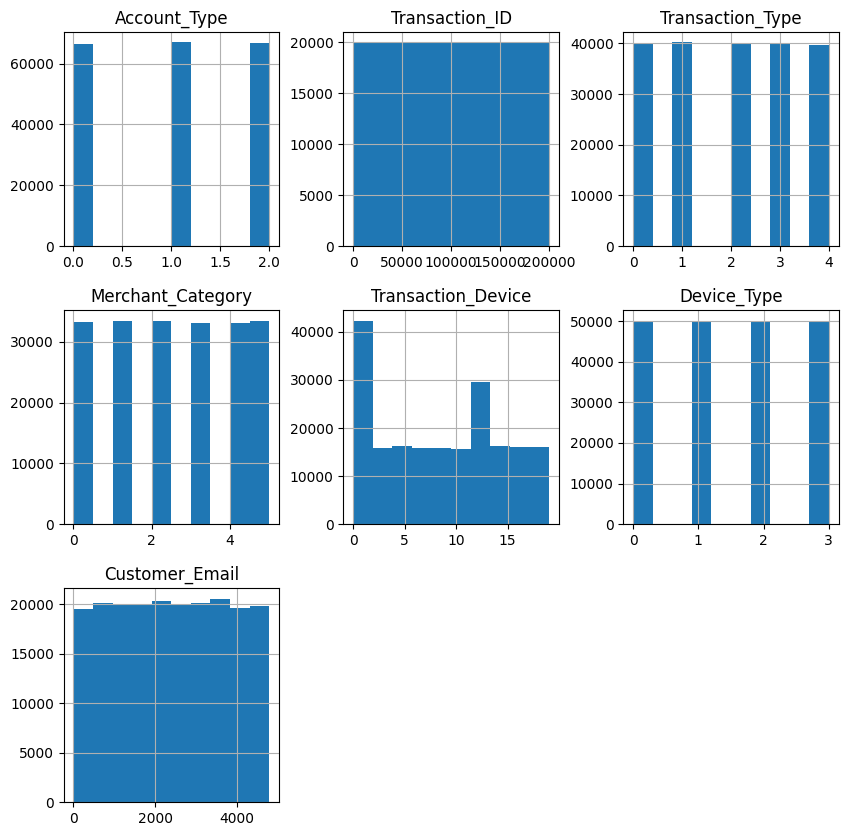

In [33]:
df[cat_features].hist(figsize=(10,10));

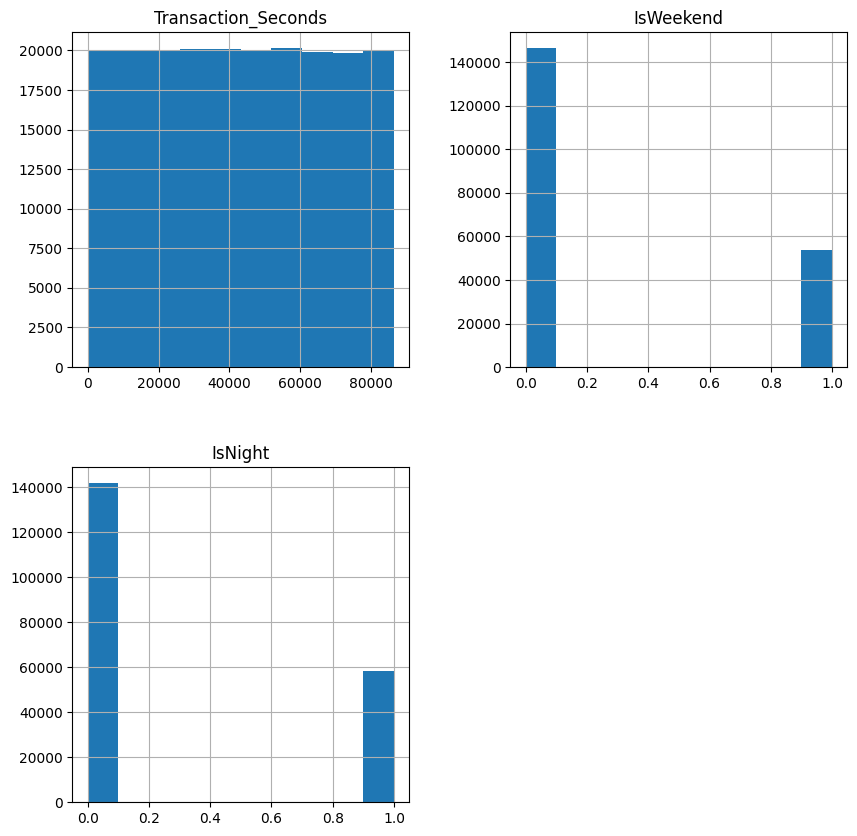

In [34]:
df[date_features].hist(figsize=(10,10));

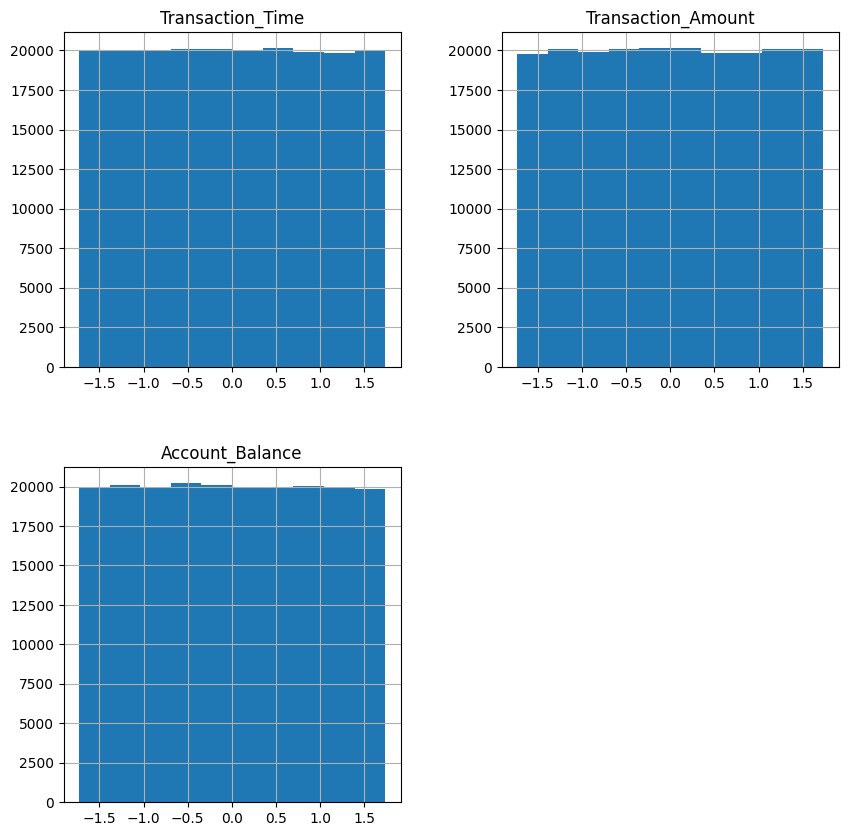

In [35]:
df[num_features].hist(figsize=(10,10));

In [36]:
df.corr()['Is_Fraud'].sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Is_Fraud               1.000000
Transaction_ID         0.004043
IsNight                0.002450
Transaction_Device     0.001304
Minute                 0.001206
Transaction_Type       0.000630
Account_Balance        0.000125
Day                   -0.000135
Device_Type           -0.000194
Customer_Email        -0.000679
Merchant_Category     -0.001342
Transaction_Seconds   -0.001909
Transaction_Time      -0.001909
Hour                  -0.001962
Transaction_Amount    -0.002100
DayOfWeek             -0.002582
Account_Type          -0.002592
IsWeekend             -0.003783
Month                       NaN
Name: Is_Fraud, dtype: float64

In [37]:
df_4_DT.corr()['Is_Fraud'].sort_values(ascending=False)

Is_Fraud               1.000000
Transaction_ID         0.004043
IsNight                0.002450
Transaction_Device     0.001304
Minute                 0.001206
Transaction_Type       0.000630
Account_Balance        0.000125
Day                   -0.000135
Device_Type           -0.000194
Customer_Email        -0.000679
Merchant_Category     -0.001342
Transaction_Seconds   -0.001909
Transaction_Time      -0.001909
Hour                  -0.001962
Transaction_Amount    -0.002100
DayOfWeek             -0.002582
Account_Type          -0.002592
IsWeekend             -0.003783
Month                       NaN
Name: Is_Fraud, dtype: float64

<Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>

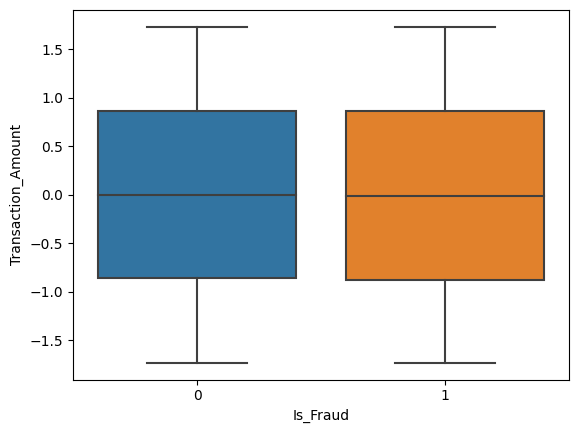

In [38]:
sns.boxplot(x='Is_Fraud', y='Transaction_Amount', data=df)

## Modeling

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    f1_score,
    recall_score
)


In [40]:
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
X = df_4_DT.drop('Is_Fraud', axis=1)
y = df_4_DT['Is_Fraud']
DT_X_train, DT_X_test, DT_y_train, DT_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
under_sampler = RandomUnderSampler(sampling_strategy=.1, random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

y_train.value_counts()

Is_Fraud
0    80700
1     8070
Name: count, dtype: int64

In [44]:
X_train.shape

(88770, 18)

In [45]:
y_train.value_counts()

Is_Fraud
0    80700
1     8070
Name: count, dtype: int64

In [46]:
for val in y_train.value_counts():
    per = (val*100)/160000
    print(per)

50.4375
5.04375


In [47]:
counter = Counter(y_train)
class_weight_ratio = counter[0] / counter[1]

In [48]:
final_results = {
    "Model": [],
    "Threshold Type": [],
    "Recall": [],
    "ROC AUC": []
}

xgbc = XGBClassifier(scale_pos_weight=class_weight_ratio, use_label_encoder=False, eval_metric='auc')
lr_best = LogisticRegression(fit_intercept=False, solver='liblinear')
LGBMC = LGBMClassifier(scale_pos_weight=class_weight_ratio,eval_metric='auc')
rf_best = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
gbc_best = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100)
meta_model = LogisticRegression(solver='liblinear', class_weight='balanced')
svm_clf = SVC(probability=True, class_weight='balanced', kernel='rbf')

stack_r_models = [
    ('lr', lr_best),
    ('rf', rf_best),
    ('svm', svm_clf),
]
stack_dt_models = [
    ('xgbc', xgbc),
    ('lgbmc', LGBMC),
    ('gbc', gbc_best)
]

# stack_clf = StackingClassifier(
#     estimators=stack_base_models,
#     final_estimator=meta_model,
#     cv=5,
#     passthrough=True
# )

models_r = {
    "Logistic Regression": lr_best,
    "Random Forest": rf_best,
    "Gradient Boosting": gbc_best,
    "SVM": svm_clf
    # "KNN": KNeighborsClassifier(),
    
    # "Voting Classifier": VotingClassifier(
    #     estimators=[
    #         ('lr', lr_best),
    #         ('rf', rf_best),
    #         ('xgbc', xgbc),
    #         ('lgbmc', LGBMC),
    #         ('gbc', gbc_best)
    #     ],
    #     voting='soft'
    # ),
    # "Stacking Classifier": stack_clf
}

models_DT = {
    "XGBC": xgbc,
    "LGBMC": LGBMC,
    "GBC": gbc_best
    # "KNN": KNeighborsClassifier(),
    
    # "Voting Classifier": VotingClassifier(
    #     estimators=[
    #         ('lr', lr_best),
    #         ('rf', rf_best),
    #         ('xgbc', xgbc),
    #         ('lgbmc', LGBMC),
    #         ('gbc', gbc_best)
    #     ],
    #     voting='soft'
    # ),
    # "Stacking Classifier": stack_clf
}

In [49]:
def evaluate_model_default_threshold(model, name, X_test, y_test):
    if not hasattr(model, "predict_proba"):
        print(f"\n=== {name} (No probas) ===")
        y_pred = model.predict(X_test)
        print("Classification report (default):")
        print(classification_report(y_test, y_pred))
        return

    print(f"\n=== {name} (Default Threshold) ===")
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    print(classification_report(y_test, y_pred))
    roc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc:.4f}")

    final_results["Model"].append(name)
    final_results["Threshold Type"].append("Default (0.5)")
    final_results["Recall"].append(recall_score(y_test, y_pred))
    final_results["ROC AUC"].append(roc)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name} (Default)")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


In [50]:
def evaluate_model_cost_threshold(model, name, X_test, y_test, fn_cost=10, fp_cost=1):
    print(f"\n=== {name} (Cost-Optimized Threshold) ===")
    y_proba = model.predict_proba(X_test)[:, 1]
    
    threshold_sample = np.linspace(0, 1, 100)
    costs = []

    for threshold in threshold_sample:
        y_pred = (y_proba >= threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        fn = cm[1, 0]
        fp = cm[0, 1]
        total_cost = fn * fn_cost + fp * fp_cost
        costs.append(total_cost)

    optimal_idx = np.argmin(costs)
    optimal_threshold = threshold_sample[optimal_idx]
    y_pred = (y_proba >= optimal_threshold).astype(int)

    print(f"Optimal Threshold (Cost): {optimal_threshold:.4f}")
    print(classification_report(y_test, y_pred))
    roc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {roc:.4f}")


    final_results["Model"].append(name)
    final_results["Threshold Type"].append("Cost-Optimized")
    final_results["Recall"].append(recall_score(y_test, y_pred))
    final_results["ROC AUC"].append(roc)


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f"Confusion Matrix - {name} (Cost-Optimized)")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


In [51]:
fn_cost = 10
fp_cost = 1


=== Logistic Regression (Default Threshold) ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37982
           1       0.00      0.00      0.00      2018

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

ROC AUC: 0.5029


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


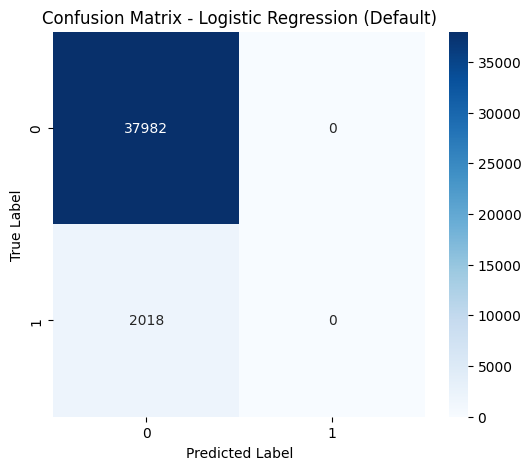


=== Logistic Regression (Cost-Optimized Threshold) ===
Optimal Threshold (Cost): 0.4141
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37982
           1       0.00      0.00      0.00      2018

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

ROC AUC: 0.5029


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


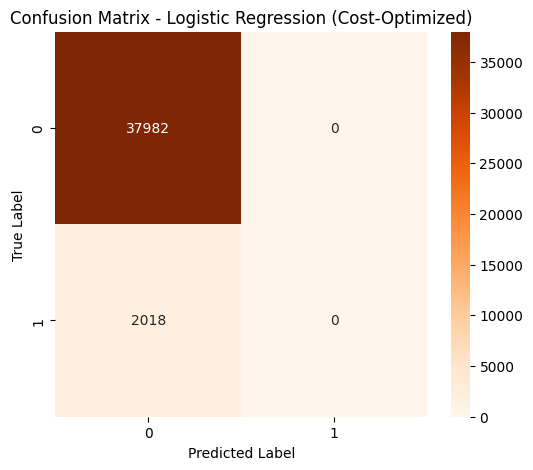

In [ ]:
for name, model in models_r.items():
    model.fit(X_train, y_train)
    
    evaluate_model_default_threshold(model, name, X_test, y_test)
    
    if hasattr(model, "predict_proba"):
        evaluate_model_cost_threshold(model, name, X_test, y_test, fn_cost, fp_cost)


In [ ]:
for name, model in models_DT.items():
    model.fit(X_train, y_train)
    
    evaluate_model_default_threshold(model, name, DT_X_test, DT_y_test)
    
    if hasattr(model, "predict_proba"):
        evaluate_model_cost_threshold(model, name, DT_X_test, DT_y_test, fn_cost, fp_cost)
